# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. **Do not forget, this is a Classification problem!**

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Check if is there any overfitting and underfitting. Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Mert Karakaya</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
winequality = pd.read_csv("winequality.csv")

# Exploratory Data Analysis

In [3]:
winequality.describe().T
#When i examine the data with describe(), it seems that there is no missing value.
#I predict that the scales of the values are different. Data can be scaled with MinMaxScaler()

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [4]:
winequality.info()
#We do not have a categorical variable. 
#Therefore, we will not do categorical variable operations in the data preprocessing section.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
winequality.shape
#Our data consists of 11 features. Because the quality is the y value.

(1599, 12)

In [6]:
winequality["quality"].unique()
#Quality variable is discrete and categorical.

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
winequality.isnull().any().sum()
#As I guessed, there is no missing data

0

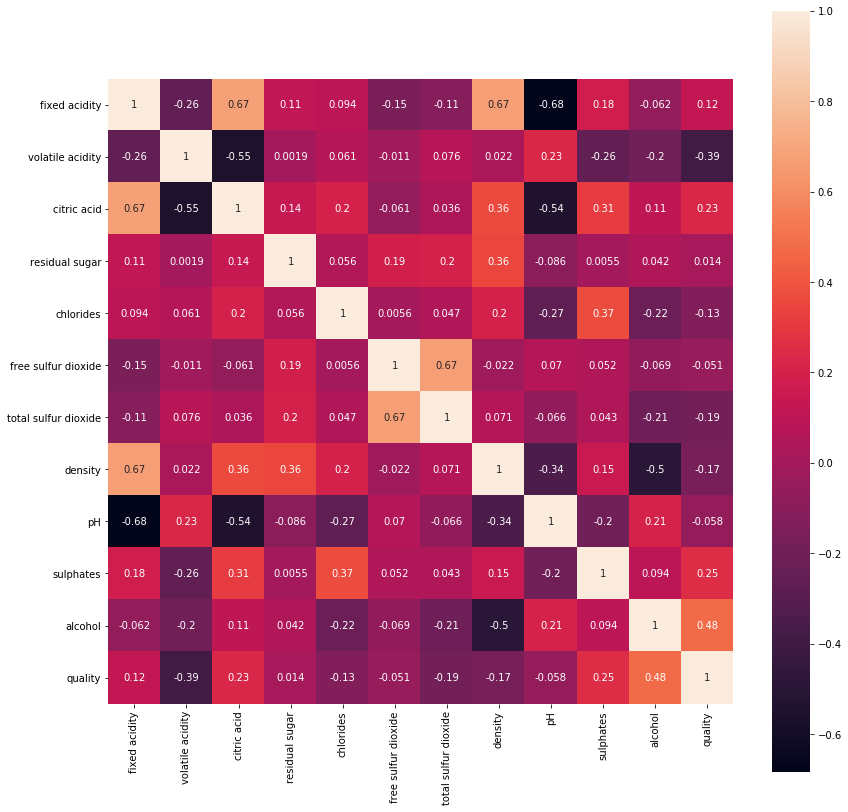

In [8]:
plt.figure(figsize=(14, 14))
sns.heatmap(winequality.corr(),square=True, annot = True);
#As we observed from the correlation graph; 
#There is a positive and moderate correlation between "alcohol" and "quality".
#“free sulphur dioxide” and “residual sugar” has almost no correlation with “quality”.

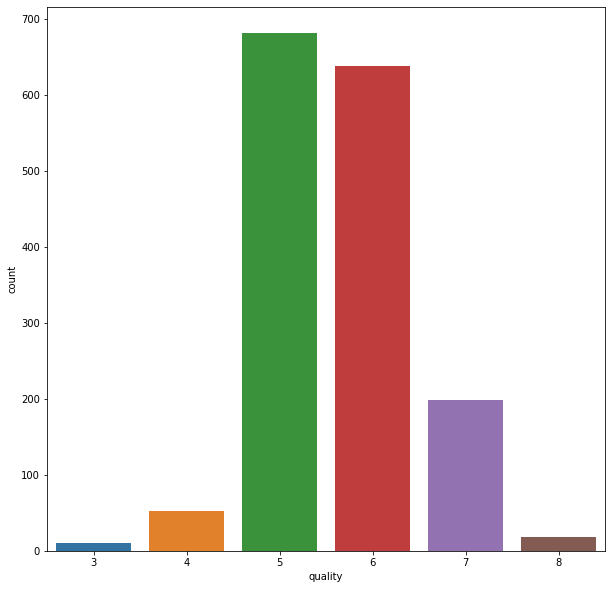

In [9]:
# Our label distribution (countplot)
#1,2,9 and 10 Quality ratings are not given by any observation.
plt.figure(figsize=(10, 10))
ax = sns.countplot(x="quality", data=winequality)

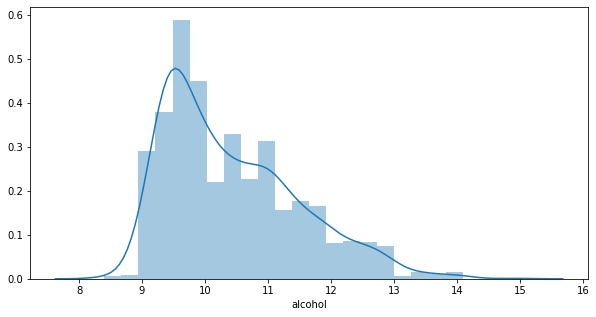

In [10]:
#In this graph we see the distribution of the alcohol variable.
plt.figure(figsize=(10, 5))
sns.distplot(a=winequality.alcohol);

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [11]:
#There are 240 duplicate data.
#The duplicates are removed so as to not give that particular data object an advantage or bias.
print("Before:",winequality.duplicated().sum())
winequality = winequality[~(winequality.duplicated())]
print("After:",winequality.duplicated().sum())

Before: 240
After: 0


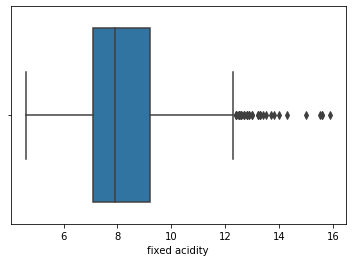

In [12]:
sns.boxplot(winequality["fixed acidity"])
#As we can see from Boxplot, there are outliers values in the data set.

In [13]:
#There are 127 outlier data. We should remove them.
from scipy import stats
z = np.abs(stats.zscore(winequality))
print(z)
outliers = list(set(np.where(z > 3)[0]))
len(outliers)
yeni=winequality.iloc[outliers].index

[[0.52443096 0.93200015 1.39325797 ... 0.57856134 0.95437429 0.7570404 ]
 [0.29406274 1.91580043 1.39325797 ... 0.12482157 0.5845748  0.7570404 ]
 [0.29406274 1.25993358 1.18861732 ... 0.05102416 0.5845748  0.7570404 ]
 ...
 [1.38831178 0.11216658 0.88165635 ... 0.59374351 0.7097234  0.45762065]
 [1.38831178 0.63139451 0.77933603 ... 0.3006673  0.21477532 0.7570404 ]
 [1.33071973 1.19956712 1.01126962 ... 0.00759108 0.52482366 0.45762065]]


In [14]:
winequality_new = winequality.drop(yeni,axis = 0).reset_index(drop = False)
winequality_new.describe().T

count        mean         std     min       25%  \
index                 1232.0  804.227273  463.764880  0.0000  402.7500   
fixed acidity         1232.0    8.303328    1.649113  5.0000    7.1000   
volatile acidity      1232.0    0.524144    0.171969  0.1200    0.3900   
citric acid           1232.0    0.266266    0.190753  0.0000    0.0900   
residual sugar        1232.0    2.376948    0.823759  1.2000    1.9000   
chlorides             1232.0    0.081702    0.022433  0.0380    0.0700   
free sulfur dioxide   1232.0   15.185877    9.335015  1.0000    7.0000   
total sulfur dioxide  1232.0   44.353896   30.051752  6.0000   21.0000   
density               1232.0    0.996673    0.001714  0.9915    0.9956   
pH                    1232.0    3.313360    0.140937  2.8800    3.2200   
sulphates             1232.0    0.642192    0.129924  0.3300    0.5500   
alcohol               1232.0   10.425785    1.038477  8.5000    9.5000   
quality               1232.0    5.646916    0.792639  4.0000    5.0000   

                            50%         75%        max  
index                 803.50000  1202.25000  1598.0000  
fixed acidity           7.90000     9.20000    13.5000  
volatile acidity        0.52000     0.63625     1.0700  
citric acid             0.25000     0.42000     0.7900  
residual sugar          2.20000     2.60000     6.5500  
chlorides               0.07900     0.08900     0.2360  
free sulfur dioxide    13.00000    21.00000    47.0000  
total sulfur dioxide   37.00000    60.00000   147.0000  
density                 0.99668     0.99780     1.0022  
pH                      3.31000     3.40000     3.7500  
sulphates               0.62000     0.71000     1.1700  
alcohol                10.20000    11.10000    13.6000  
quality                 6.00000     6.00000     8.0000

In [15]:
#Define dependent and independent variables.
X = winequality_new.drop(['quality'], axis = 1) # independent variable
y = winequality_new[['quality']] #dependent variable

In [16]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 2.82352941e-01, 6.10526316e-01, ...,
        7.24137931e-01, 2.73809524e-01, 1.76470588e-01],
       [6.25782228e-04, 3.29411765e-01, 8.00000000e-01, ...,
        3.67816092e-01, 4.16666667e-01, 2.54901961e-01],
       [1.25156446e-03, 3.29411765e-01, 6.73684211e-01, ...,
        4.36781609e-01, 3.80952381e-01, 2.54901961e-01],
       ...,
       [9.98122653e-01, 1.05882353e-01, 4.52631579e-01, ...,
        7.35632184e-01, 5.11904762e-01, 5.29411765e-01],
       [9.99374218e-01, 1.05882353e-01, 5.52631579e-01, ...,
        7.93103448e-01, 4.52380952e-01, 3.33333333e-01],
       [1.00000000e+00, 1.17647059e-01, 2.00000000e-01, ...,
        5.86206897e-01, 3.92857143e-01, 4.90196078e-01]])

In [17]:
from sklearn.model_selection import train_test_split, cross_validate

#Scaling and outlier removed
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=42)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

### Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
logistic_model = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(logistic_model,X_train,y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.5974077300296813
Test accuracy: 0.5621621621621622


In [19]:
print(classification_report(y_test, cv["estimator"][0].predict(X_test)))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        19
           5       0.64      0.74      0.69       156
           6       0.49      0.57      0.53       141
           7       0.48      0.24      0.32        45
           8       0.00      0.00      0.00         9

    accuracy                           0.56       370
   macro avg       0.32      0.31      0.31       370
weighted avg       0.51      0.56      0.53       370



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


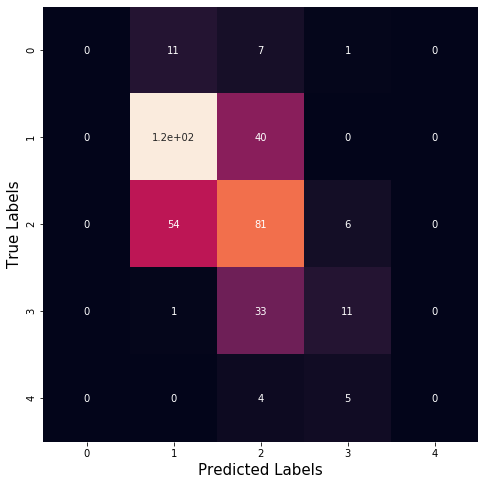

In [20]:
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### Decision Tree Model

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param = [{
    "criterion" : ['gini','entropy'],
    "max_depth" : range(1,10),
    "min_samples_split" : range(1,10),
    "min_samples_leaf" : [1,2,4,5,10,20,30,40,80,100]
}]
decision_tree = DecisionTreeClassifier()
clf = GridSearchCV(estimator=decision_tree,param_grid=param,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 1620 candidates, totalling 16200 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 343 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 9720 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 16200 out of 16200 | elapsed:   21.3s finished


In [22]:
print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

Tuned: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 2}
Mean of the cv scores is 0.597380
Train Score 0.651972
Test Score 0.502703
Seconds used for refitting the best model on the train dataset: 0.004002


In [23]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        19
           5       0.62      0.62      0.62       156
           6       0.43      0.55      0.48       141
           7       0.39      0.27      0.32        45
           8       0.00      0.00      0.00         9

    accuracy                           0.50       370
   macro avg       0.29      0.29      0.28       370
weighted avg       0.47      0.50      0.48       370



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.28574217955497705
Recall = 0.28704855428259685
Accuracy = 0.5027027027027027
F1 Score = 0.2825311141100615


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


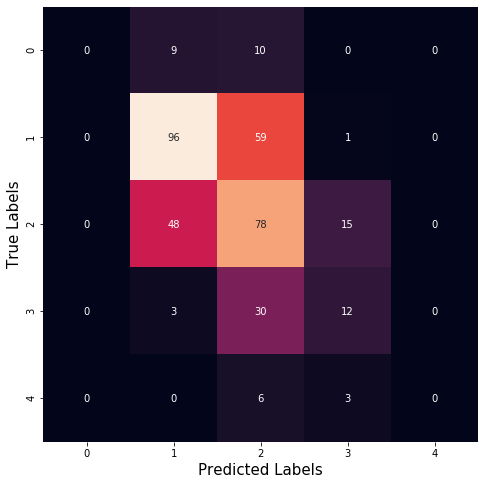

In [25]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### XGBoost Model

In [26]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
print("Train Score {:.6f}".format(model.score(X_train,y_train)))
print("Test Score {:.6f}".format(model.score(X_test,y_test)))

Train Score 0.830626
Test Score 0.575676


In [28]:
# Metrics
print("Precision = {}".format(precision_score(y_test, predictions, average='macro')))
print("Recall = {}".format(recall_score(y_test, predictions, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predictions)))
print("F1 Score = {}".format(f1_score(y_test, predictions,average='macro')))

Precision = 0.3414044164365088
Recall = 0.3415930169121658
Accuracy = 0.5756756756756757
F1 Score = 0.3383396770673052


In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        19
           5       0.64      0.71      0.67       156
           6       0.52      0.60      0.56       141
           7       0.55      0.40      0.46        45
           8       0.00      0.00      0.00         9

    accuracy                           0.58       370
   macro avg       0.34      0.34      0.34       370
weighted avg       0.54      0.58      0.55       370



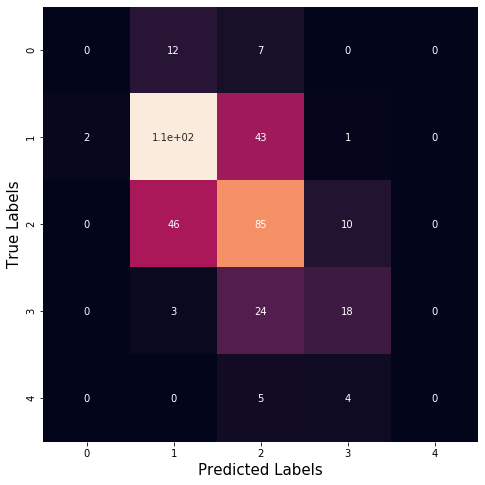

In [30]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, predictions)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

* I tested the dataset on three models. These are Logistic Regression, Decision Tree and XGBoost algorithms. When I examined the results, I saw that the most accurate model was XGBoost.
